In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from tensorboard.backend.event_processing import event_accumulator

%matplotlib inline

<Figure size 432x288 with 0 Axes>

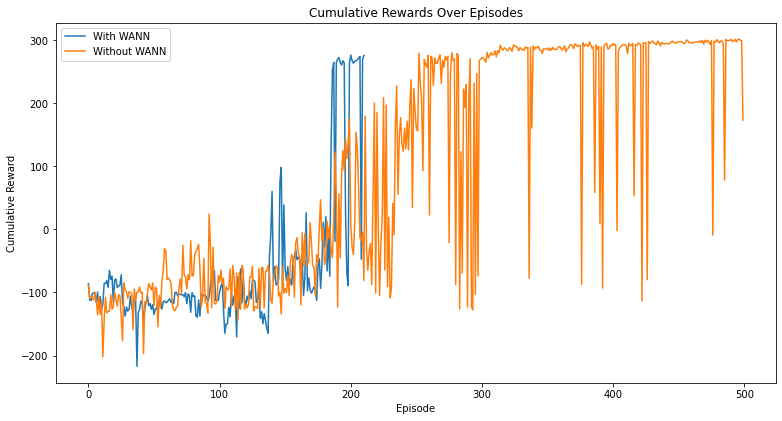

In [54]:
# plot mean reward over episodes
W_WANN_PATH_TO_MONITOR = WITHOUT_WANN_PATH_TO_MONITOR = f'C:{os.sep}Users{os.sep}Blake{os.sep}Documents{os.sep}software_engineering{os.sep}research{os.sep}mehrdad{os.sep}WANN{os.sep}src{os.sep}result{os.sep}wann-sac-bipedalwalker-v3-18{os.sep}log{os.sep}monitor.csv'
wann_alg_df = pd.read_csv(W_WANN_PATH_TO_MONITOR, skiprows=1)

WITHOUT_WANN_PATH_TO_MONITOR = f'C:{os.sep}Users{os.sep}Blake{os.sep}Documents{os.sep}software_engineering{os.sep}research{os.sep}mehrdad{os.sep}WANN{os.sep}src{os.sep}result{os.sep}without-wann-sac-bipedalwalker-v3-3{os.sep}log{os.sep}monitor.csv'
wout_wann_alg_df = pd.read_csv(WITHOUT_WANN_PATH_TO_MONITOR, skiprows=1)

plt.clf()
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('Episode')
ax.set_ylabel('Cumulative Reward')
ax.set_title('Cumulative Rewards Over Episodes')

n_episodes = wann_alg_df.shape[0]
n_episodes = 211

x = range(n_episodes)
ax.plot(x, wann_alg_df[:n_episodes]['r'], label='With WANN')

n_episodes = wout_wann_alg_df.shape[0]
n_episodes = 500

x = range(n_episodes)
ax.plot(x, wout_wann_alg_df[:n_episodes]['r'], label = "Without WANN")
ax.legend()

In [34]:
def load_tf(dirname):
    dirname = glob.glob(dirname + '/*/*')[0]
    
    ea = event_accumulator.EventAccumulator(dirname, size_guidance={event_accumulator.SCALARS: 0})
    ea.Reload()
    dframes = {}
    mnames = ea.Tags()['scalars']
    
    for n in mnames:
        print(ea.Scalars(n))
        
#         dframes[n] = pd.DataFrame(ea.Scalars(n), columns=["wall_time", "epoch", n.replace('val/', '')])
#         dframes[n].drop("wall_time", axis=1, inplace=True)
#         dframes[n] = dframes[n].set_index("epoch")
#     return pd.concat([v for k,v in dframes.items()], axis=1)

In [6]:
wann_tb_path = f'C:{os.sep}Users{os.sep}Blake{os.sep}Desktop{os.sep}prev-runs{os.sep}wann-sac-bipedalwalker-v3-1{os.sep}log{os.sep}tb-log'
wann_tb_df = load_tf(wann_tb_path)

[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=1300.4000244140625)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=-34.95099639892578)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=238.1999969482422)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=-104.22283935546875)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=66.0)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=-20.46751594543457)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=5.240581512451172)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=0.7972384691238403)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=-1.4661630392074585)]
[ScalarEvent(wall_time=1600680280.5753653, step=2382, value=9.999999747378752e-05)]
